Imports

In [107]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from collections import Counter
import seaborn as sns
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, mean_squared_error

Data import

In [104]:
df = pd.read_csv('data/processed/EDA.csv', usecols=['ID', 'INTERPRET', 'TITEL', 'processed_TITLE', 'TEXT', 'processed_TEXT','DATUM_VON', 'DATUM_BIS', 'JAHR', 'MONAT', 'DAUER','ANZ_UNIQUE_WOERTER', 'MAX_WORT_WDH', 'WORT_MAX_WDH','LEN_LAENGSTES_WORT', 'ANZ_TITLE_WDH','PCT_STOPWORD', 'PCT_WORT_WDH','PCT_TITLE_WDH','LEN_TITLE','LEN_TEXT','IS_SEASONAL', 'IS_MULTILINGUAL','PCT_GERMAN', 'POSITION', 'RANK_SCORE', 'MAX_RANK_SCORE','MEAN_RANK_SCORE'])
print(df.columns)

Index(['ID', 'INTERPRET', 'TITEL', 'processed_TITLE', 'TEXT', 'processed_TEXT',
       'DATUM_VON', 'DATUM_BIS', 'JAHR', 'MONAT', 'DAUER',
       'ANZ_UNIQUE_WOERTER', 'MAX_WORT_WDH', 'WORT_MAX_WDH',
       'LEN_LAENGSTES_WORT', 'ANZ_TITLE_WDH', 'PCT_STOPWORD', 'PCT_WORT_WDH',
       'PCT_TITLE_WDH', 'LEN_TITLE', 'LEN_TEXT', 'IS_SEASONAL',
       'IS_MULTILINGUAL', 'PCT_GERMAN', 'POSITION', 'RANK_SCORE',
       'MAX_RANK_SCORE', 'MEAN_RANK_SCORE'],
      dtype='object')


In [91]:
print(np.shape(df))

(22762, 28)


In [138]:
print(df.loc[df['ID']==835544])

           ID    INTERPRET                           TITEL  \
14609  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14610  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14611  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14612  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14613  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14614  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14615  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14616  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14617  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14618  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14619  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14620  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14621  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14622  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14623  835544  Tim Bendzko  Nur noch kurz die Welt retten    
14624  8

In [109]:
#SMOTETOMEK
def smote_resample(X,y):
    smt = RandomOverSampler(sampling_strategy='not majority')#SMOTETomek(random_state=42)
    X_res, y_res = smt.fit_resample(X, y)
    return X_res,y_res

In [93]:
def determine_top10():
    for index, row in df.iterrows():
        if np.isnan(row['TOP10']) or row['TOP10'] == False:
            df.loc[(df['ID'] == row['ID']), 'TOP10'] = row['POSITION']<=10

In [94]:
def cluster_rank_score():
    for index, row in df.iterrows():
        if np.isnan(row['10er']):
            df.loc[(df['ID'] == row['ID']), '10er'] = math.trunc((row['MAX_RANK_SCORE']-1)/10)

In [95]:
def sum_RANK_SCORE():
    for index, row in df.iterrows():
        if np.isnan(row['SUMMED_RANK_SCORE']):
            df.loc[(df['ID'] == row['ID']), 'SUMMED_RANK_SCORE'] = sum(df.loc[(df['ID'] == row['ID']), 'RANK_SCORE'])

In [96]:
from sklearn.metrics import confusion_matrix, classification_report
def model_score(y_pred, y_test, labels, name):
    print('----------')
    print('Modell: ' +  name)
    print('Confusion matrix')
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred, labels=labels)
    print(cm)
    report = classification_report(y_true=y_test, y_pred=y_pred, labels=labels)
    print(report)


In [124]:
from sklearn import tree
def plot_tree(classifier, class_names, feature_names):
    fig = plt.figure(dpi=1000)
    _ = tree.plot_tree(classifier,
                       feature_names=feature_names,
                       class_names=class_names,
                       filled=True)

In [105]:
df['SUMMED_RANK_SCORE'] = np.NaN
sum_RANK_SCORE()
df['TOP10'] = [False for _ in range(0, 22762)]
determine_top10()
df['10er'] = np.nan
cluster_rank_score()
print(df.head())

    ID       INTERPRET   TITEL processed_TITLE  \
0  408     Rumpelstilz  Kiosk        ['KIOSK']   
1  408     Rumpelstilz  Kiosk        ['KIOSK']   
2  425  Costa Cordalis  Anita        ['ANITA']   
3  425  Costa Cordalis  Anita        ['ANITA']   
4  425  Costa Cordalis  Anita        ['ANITA']   

                                                TEXT  \
0  ALSO ER SAMMLE FUER EINEN GUTEN ZWECK  SAGT DE...   
1  ALSO ER SAMMLE FUER EINEN GUTEN ZWECK  SAGT DE...   
2  JVUIOUGIVTOH ICH FAND SIE IRGENDWO  ALLEIN IN ...   
3  JVUIOUGIVTOH ICH FAND SIE IRGENDWO  ALLEIN IN ...   
4  JVUIOUGIVTOH ICH FAND SIE IRGENDWO  ALLEIN IN ...   

                                      processed_TEXT   DATUM_VON   DATUM_BIS  \
0  ['ALSO', 'SAMML', 'FUER', 'GUT', 'ZWECK', 'SAG...  2009-03-06  2009-03-12   
1  ['ALSO', 'SAMML', 'FUER', 'GUT', 'ZWECK', 'SAG...  1984-10-22  1984-10-28   
2  ['JVUIOUGIVTOH', 'FAND', 'IRGENDWO', 'ALLEIN',...  2003-08-25  2003-08-31   
3  ['JVUIOUGIVTOH', 'FAND', 'IRGENDWO', 'A

Train-Test Split & resample

In [86]:
#df = df.groupby(['ID']).first()
#print(len(df))

In [136]:
df_test = df.loc[df['JAHR'] == 2022]
df_train = df.loc[df['JAHR'] < 2022]

X = df[['ANZ_UNIQUE_WOERTER', 'MAX_WORT_WDH','LEN_LAENGSTES_WORT', 'ANZ_TITLE_WDH','PCT_STOPWORD', 'PCT_WORT_WDH','PCT_TITLE_WDH','LEN_TITLE','LEN_TEXT']]
y = df['TOP10']

#X_train = df_train[['ANZ_UNIQUE_WOERTER', 'MAX_WORT_WDH', 'LEN_LAENGSTES_WORT', 'ANZ_TITLE_WDH','LEN_TITLE','LEN_TEXT']]
X_train = df_train[['ANZ_UNIQUE_WOERTER', 'MAX_WORT_WDH','LEN_LAENGSTES_WORT', 'ANZ_TITLE_WDH','PCT_STOPWORD', 'PCT_WORT_WDH','PCT_TITLE_WDH','LEN_TITLE','LEN_TEXT']]
y_train = df_train['TOP10']

#X_test = df_test[['ANZ_UNIQUE_WOERTER', 'MAX_WORT_WDH', 'LEN_LAENGSTES_WORT', 'ANZ_TITLE_WDH','LEN_TITLE','LEN_TEXT']]
X_test = df_test[['ANZ_UNIQUE_WOERTER', 'MAX_WORT_WDH','LEN_LAENGSTES_WORT', 'ANZ_TITLE_WDH','PCT_STOPWORD', 'PCT_WORT_WDH','PCT_TITLE_WDH','LEN_TITLE','LEN_TEXT']]
y_test = df_test['TOP10']

print(np.shape(X_train))
print(np.shape(y_train))

count = Counter(y_train)
print(count)
count = Counter(y_test)
print(count)

#resample
X_train, y_train = smote_resample(X_train,y_train)
print(np.shape(X_train))
print(np.shape(y_train))

count = Counter(y_train)
print(count)
count = Counter(y_test)
print(count)

(22056, 9)
(22056,)
Counter({False: 17671, True: 4385})
Counter({False: 536, True: 170})
(35342, 9)
(35342,)
Counter({True: 17671, False: 17671})
Counter({False: 536, True: 170})


Cross Validation

In [28]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

Hyperparameter tuning

In [114]:
from sklearn.model_selection import GridSearchCV

def tune_tree(params, classifier, scoring, X, y):
    grid_search = GridSearchCV(estimator=classifier,param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = scoring)
    grid_search.fit(X,y)
    score_df = pd.DataFrame(grid_search.cv_results_)
    score_df.nlargest(4,"mean_test_score")
    print(max(score_df['mean_test_score']))
    return grid_search.best_estimator_, score_df

Modelling

DecisionTreeClassifier

Counter({False: 536, True: 170})
Counter({False: 590, True: 116})
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.6587612497671843
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.043499      0.001659         0.002751    4.336714e-04   
1        0.042997      0.006282         0.003002    7.076474e-04   
2        0.041251      0.004604         0.002250    4.330502e-04   
3        0.039999      0.001871         0.002250    4.330847e-04   
4        0.043501      0.006343         0.001999    8.513246e-07   
5        0.053500      0.007298         0.002250    4.343581e-04   
6        0.048999      0.002550         0.002252    4.334991e-04   
7        0.056249      0.006758         0.002500    8.658596e-04   
8        0.049500      0.003905         0.004750    4.206388e-03   
9        0.048000      0.003536         0.002750    4.331190e-04   
10       0.067250      0.003632         0.002250    4.328437e-04   
11       0.065501      0.008959      

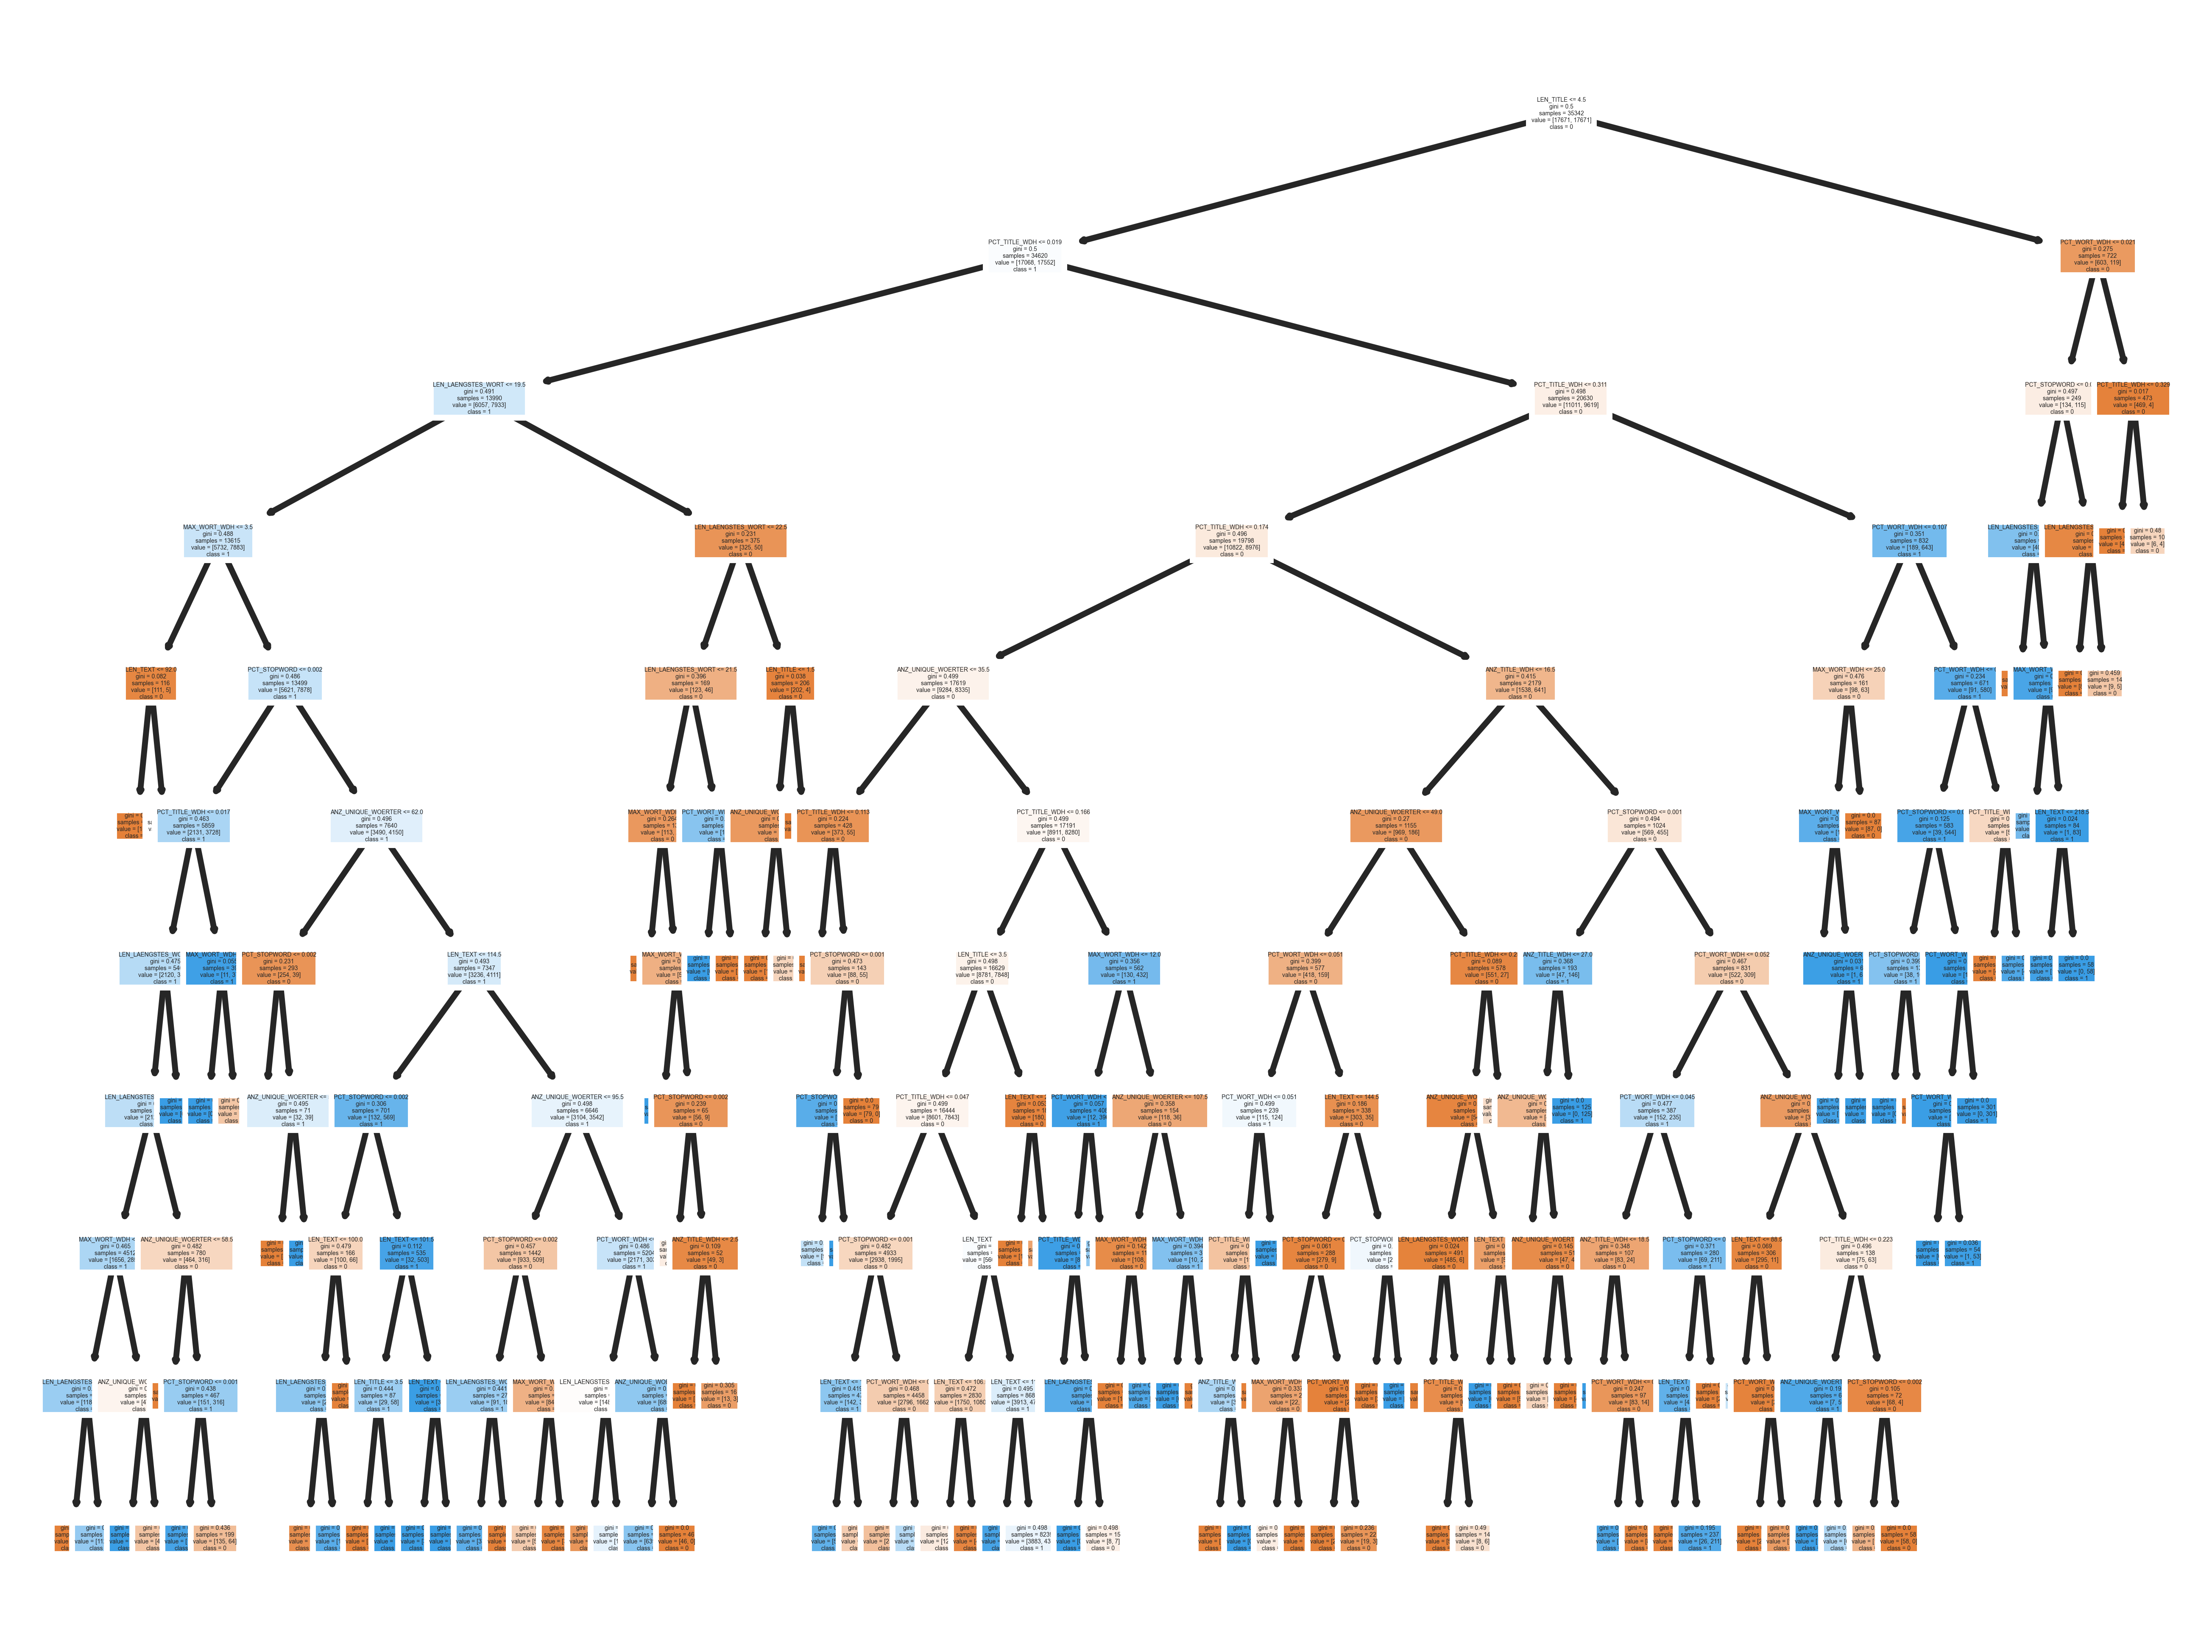

In [125]:
#model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#evaluate initial tree
#model_score(y_pred=y_pred,y_test=y_test, labels=clf.classes_, name='DecisionTree Classifier')
count = Counter(y_test)
print(count)
count = Counter(y_pred)
print(count)
#plot_tree(clf,['0','1'], X_train.columns)

#cross validation
#decision_tree_result = cross_validation(clf, X,y, 5)
#print(decision_tree_result)


#tune tree
params = {
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

clf, score_df = tune_tree(params, clf, "accuracy", X_train, y_train)
print(score_df)
print(clf)
y_pred = clf.predict(X_test)
model_score(y_pred=y_pred,y_test=y_test, labels=clf.classes_, name='DecisionTree Classifier')
#print tree
plot_tree(clf,['0','1','2','3','4'], X_train.columns)

----

Random Forrest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#evaluate initial tree
model_score(y_pred=y_pred,y_test=y_test, labels=clf.classes_, name='RandomForest Classifier')
count = Counter(y_test)
print(count)
count = Counter(y_pred)
print(count)

#tune tree
params ={'max_depth': [5, 10, 20, 30],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4, 10, 25, 50],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [100, 200, 400]}

rf_tuned, score_df = tune_tree(params, rf, "accuracy", X_train, y_train)
score_df

----------
Modell: RandomForest Classifier
Confusion matrix
[[75 12]
 [33  5]]
              precision    recall  f1-score   support

       False       0.69      0.86      0.77        87
        True       0.29      0.13      0.18        38

    accuracy                           0.64       125
   macro avg       0.49      0.50      0.48       125
weighted avg       0.57      0.64      0.59       125

Counter({False: 87, True: 38})
Counter({False: 108, True: 17})
Fitting 4 folds for each of 432 candidates, totalling 1728 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.304001,0.008861,0.016250,0.000433,5,auto,1,2,100,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.508117,0.654221,0.617384,0.460601,0.560081,0.078649,330
1,0.628751,0.024499,0.034499,0.003775,5,auto,1,2,200,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.512175,0.660714,0.611698,0.454915,0.559876,0.080849,331
2,1.298998,0.089854,0.069001,0.006206,5,auto,1,2,400,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.510552,0.646104,0.609261,0.454915,0.555208,0.076218,368
3,0.298751,0.001479,0.016750,0.000433,5,auto,1,5,100,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.515422,0.645292,0.610885,0.459789,0.557847,0.073951,349
4,0.622500,0.043073,0.032000,0.001225,5,auto,1,5,200,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.506494,0.643669,0.614135,0.458164,0.555615,0.075973,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.666749,0.017469,0.035500,0.000866,30,sqrt,50,5,200,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.530032,0.669643,0.627945,0.447604,0.568806,0.086399,306
428,1.348501,0.031004,0.067999,0.003938,30,sqrt,50,5,400,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.530844,0.666396,0.619821,0.463851,0.570228,0.078382,293
429,0.336999,0.011662,0.017500,0.000500,30,sqrt,50,10,100,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.526786,0.659091,0.626320,0.467100,0.569824,0.076754,297
430,0.687998,0.019065,0.035751,0.000830,30,sqrt,50,10,200,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.530032,0.663149,0.627945,0.460601,0.570432,0.079999,288


In [32]:
y_pred = rf_tuned.predict(X_test)
model_score(y_pred=y_pred,y_test=y_test, labels=rf_tuned.classes_, name='RandomForestClassifier')
count = Counter(y_test)
print(count)
count = Counter(y_pred)
print(count)

----------
Modell: RandomForestClassifier
Confusion matrix
[[74 13]
 [34  4]]
              precision    recall  f1-score   support

       False       0.69      0.85      0.76        87
        True       0.24      0.11      0.15        38

    accuracy                           0.62       125
   macro avg       0.46      0.48      0.45       125
weighted avg       0.55      0.62      0.57       125

Counter({False: 87, True: 38})
Counter({False: 108, True: 17})


-----------

XGBoosted Classifier

In [128]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [134]:
def hyperparameter_tuning(space):
    model = XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha'],min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree']))
    evaluation = [( x_train, y_train), ( x_test, y_test)]

    model.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

In [133]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_score(y_pred=y_pred,y_test=y_test, labels=clf.classes_, name='XGBoosted Classifier')
count = Counter(y_test)
print(count)
count = Counter(y_pred)
print(count)


space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }
hyperparameter_tuning(space)

----------
Modell: XGBoosted Classifier
Confusion matrix
[[471  65]
 [129  41]]
              precision    recall  f1-score   support

       False       0.79      0.88      0.83       536
        True       0.39      0.24      0.30       170

    accuracy                           0.73       706
   macro avg       0.59      0.56      0.56       706
weighted avg       0.69      0.73      0.70       706

Counter({False: 536, True: 170})
Counter({0: 600, 1: 106})


TypeError: hyperparameter_tuning() missing 4 required positional arguments: 'x_train', 'y_train', 'x_test', and 'y_test'

In [135]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)
print (best)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: int() takes at most 2 arguments (3 given)



  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]


TypeError: int() takes at most 2 arguments (3 given)

In [35]:
ypred = model.predict(X_test)
model_score(ypred,y_test,X_test.columns, 'XGBOOSTED')

----------
Modell: XGBOOSTED
Confusion matrix


TypeError: '<' not supported between instances of 'str' and 'bool'

In [55]:
count5 = Counter(ypred)
print(count5)
count6 = Counter(y_test)
print(count6)

Counter({0: 553, 1: 153})
Counter({False: 536, True: 170})


In [61]:
score = rf.score(X_train, y_train)
ypred = rf.predict(X_test)
mse = mean_squared_error(y_test, ypred)

print(score)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print(np.shape(ypred))
print(np.shape(y_test))
df_ = pd.DataFrame()
df_["y_test"] = y_test
df_["y_pred"] = ypred
print(df_.head())

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [85]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
mse = mean_squared_error(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(f'Mean Squared Error: {mse:.13}')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [17]:
scaler = MinMaxScaler()
data = [[index, ypred[index]] for index in range(1,len(ypred))]
print(scaler.fit(data))
print(scaler.data_max_)
print(scaler.transform(data))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train)

MinMaxScaler()
[705.  49.]
[[0.         0.52083333]
 [0.00142045 0.52083333]
 [0.00284091 0.52083333]
 ...
 [0.99715909 0.95833333]
 [0.99857955 0.64583333]
 [1.         0.14583333]]


In [63]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=df.RANK_SCORE, index=df.RANK_SCORE)
sns.heatmap(cm, annot=True)

ValueError: Shape of passed values is (50, 50), indices imply (22762, 22762)

In [ ]:
df.RANK_SCORE

----

Regression

ValueError: x and y must be the same size

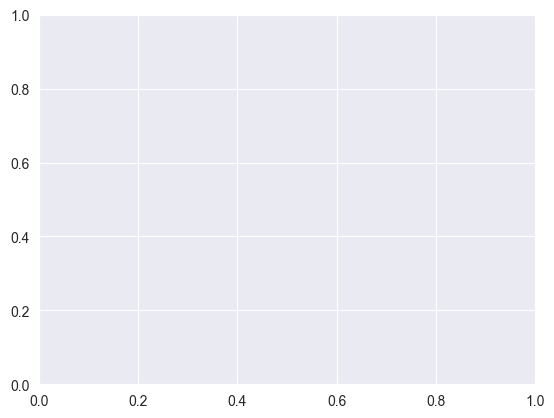

In [71]:
from sklearn.tree import DecisionTreeRegressor
reg =DecisionTreeRegressor()
reg.fit(X_train, y_train)
reg.score(X_test,y_test)
ypred = reg.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, ypred, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Evaluation